# 2.数据描述性统计

本notebook为自己的学习笔记，想看原始版本请移步：
[出租车 GPS 数据——时空大数据处理基础.ipynb](%B3%F6%D7%E2%B3%B5%20GPS%20%CA%FD%BE%DD%A1%AA%A1%AA%CA%B1%BF%D5%B4%F3%CA%FD%BE%DD%B4%A6%C0%ED%BB%F9%B4%A1.ipynb)


## 1.读取数据

In [2]:
import pandas as pd

# 读取 Parquet 文件
data = pd.read_parquet('./data/TaxiOD-Clean.parquet') # <<< 上一步生成的数据
data.head()

,VehicleNum,StartTime,EndTime,StartLng,StartLat,EndLng,EndLat,Speed,TripTime,TripDistance
0,22334.0,2013-10-22 00:07:57,2013-10-22 00:18:16,114.080498,22.554182,114.084915,22.540850,0.0,10.316667,1.544684
1,22334.0,2013-10-22 00:19:05,2013-10-22 00:44:52,114.084915,22.540850,114.056236,22.633383,0.0,25.783333,10.662886
2,22334.0,2013-10-22 02:38:52,2013-10-22 02:47:04,114.091637,22.543200,114.093536,22.554382,1.0,8.200000,1.253581
3,22334.0,2013-10-22 03:58:57,2013-10-22 04:23:07,114.038818,22.553232,114.052216,22.602118,1.0,24.166667,5.586134
4,22334.0,2013-10-22 06:30:19,2013-10-22 06:41:20,114.031250,22.519550,114.067886,22.521299,0.0,11.016667,3.774126


In [4]:
## 2.分时数据量的统计
data['hour'] = data['StartTime'].dt.hour # 通过.dt.hour属性提取StartTime列中每个时间戳的小时部分，并将这个小时信息存储在新的列hour中。
data['hour']  # []中的内容是列名，表示提取这一列的数据 notebook会自动显示这一列的数据

0         0
1         0
2         2
3         3
4         6
         ..
16752    22
16753    22
16754    23
16755    23
16756    23
Name: hour, Length: 15878, dtype: int32

In [5]:
# 按小时分组并计数
hourly_orders = data.groupby('hour').size()
hourly_orders

hour
0     655
1     466
2     332
3     257
4     176
5     192
6     308
7     566
8     786
9     776
10    831
11    756
12    731
13    837
14    909
15    863
16    755
17    713
18    646
19    793
20    916
21    941
22    973
23    700
dtype: int64

## 绘图

In [6]:
# 导入绘图库
import matplotlib.pyplot as plt # 这行代码导入了matplotlib库，并将其简称为plt。
import seaborn as sns

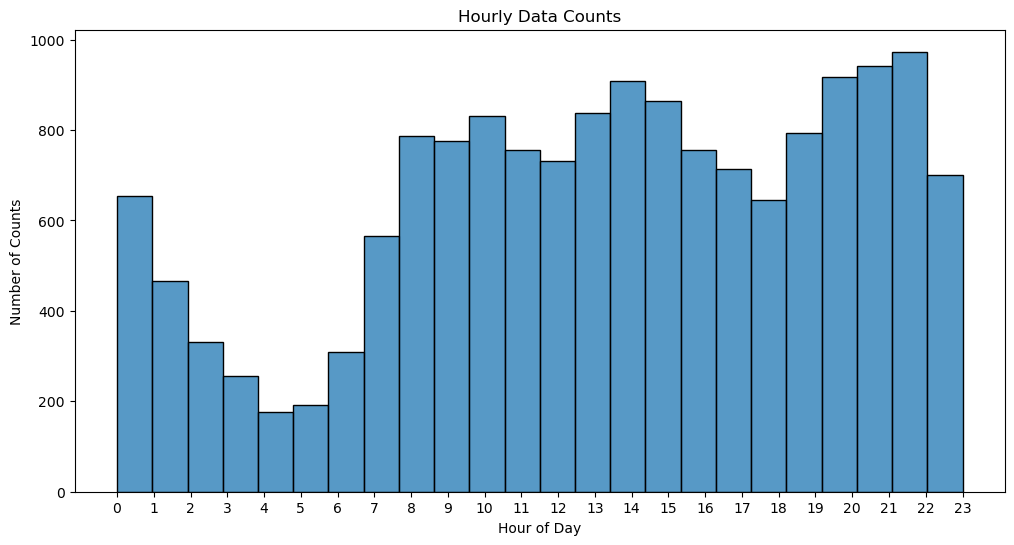

In [7]:
# 绘制折线图
plt.figure(figsize=(12, 6))
ax = sns.histplot(data, x='hour', bins=24)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Counts')
ax.set_xticks(range(0, 24))
title = 'Hourly Data Counts'
ax.set_title(title)
plt.show()